An important subject in machine learning is decision trees.

In this example we want to predict the quality of wines from the noth of Portugal

In [1]:
import pandas as pd

wine_df = pd.read_csv("wines.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,5.5,0.32,0.13,1.30,0.037,45.0,156.0,0.99184,3.26,0.38,10.7,0,5
1,7.8,0.76,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,5
2,6.3,0.23,0.22,3.75,0.039,37.0,116.0,0.99270,3.23,0.50,10.7,0,6
3,5.9,0.32,0.20,14.40,0.050,29.0,144.0,0.99666,3.24,0.41,10.3,0,6
4,5.7,0.16,0.32,1.20,0.036,7.0,89.0,0.99111,3.26,0.48,11.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.9,0.26,0.41,15.15,0.040,38.0,216.0,0.99760,2.96,0.60,10.0,0,6
6493,6.5,0.18,0.33,1.40,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,0,7
6494,6.3,0.76,0.00,2.90,0.072,26.0,52.0,0.99379,3.51,0.60,11.5,1,6
6495,10.2,0.41,0.43,2.20,0.110,11.0,37.0,0.99728,3.16,0.67,10.8,1,5


In [2]:
# Spliting the data in test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_df.loc[:, 'fixed acidity':'color'],
                                                    wine_df['quality'],
                                                    test_size=0.25,
                                                    random_state=42)

In [3]:
# Using regrssion --> predict a numerical value
from sklearn.tree import DecisionTreeRegressor

wine_tree = DecisionTreeRegressor(max_depth=3)

wine_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

For this we cannot use the accuracy ... because we want to predict a numerical value

Hence we have to use Mean Absolute Error MAE

MAE= ∑(n)(i=1)|yi−^yi| / n

In [4]:
from sklearn import metrics

predicted = wine_tree.predict(X_test)
print(metrics.mean_absolute_error(y_test, predicted))

0.5894927147838183


In order to understand what is the meaning we can design a decision tree

The color of each branch will be the value

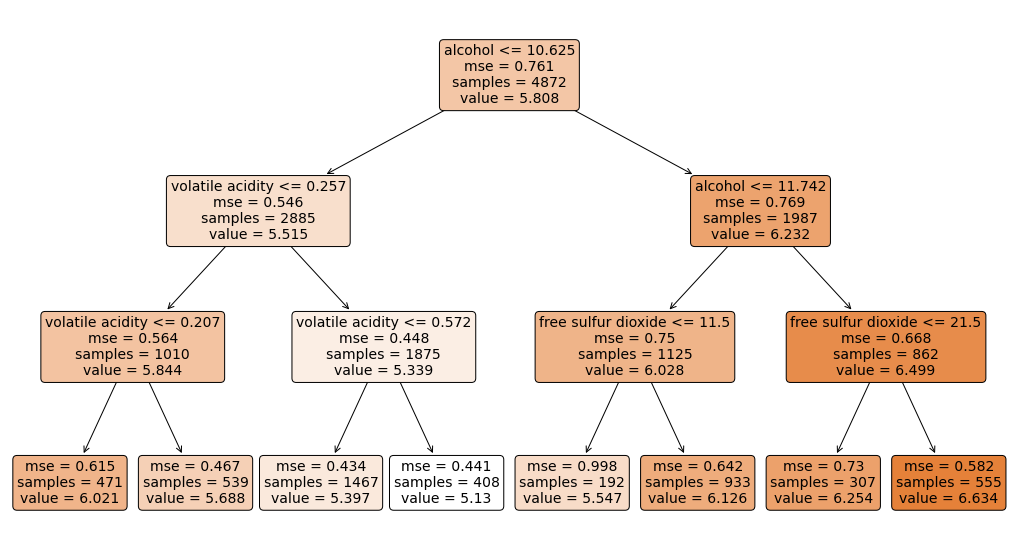

In [5]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(18, 10))
_ = tree.plot_tree(wine_tree, 
                   feature_names=wine_df.columns[:-1],
                   filled=True, rounded=True, fontsize=14)

We can see that the above tree has some issues for example the <= rather than using the typical mathematical representation

Because we care about how things look , a more aesthetic result can be established by using GraphViz from pydotplus

https://graphviz.org/download/

In [6]:
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(wine_tree, out_file=dot_data,  
                     feature_names=wine_df.columns[:-1],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

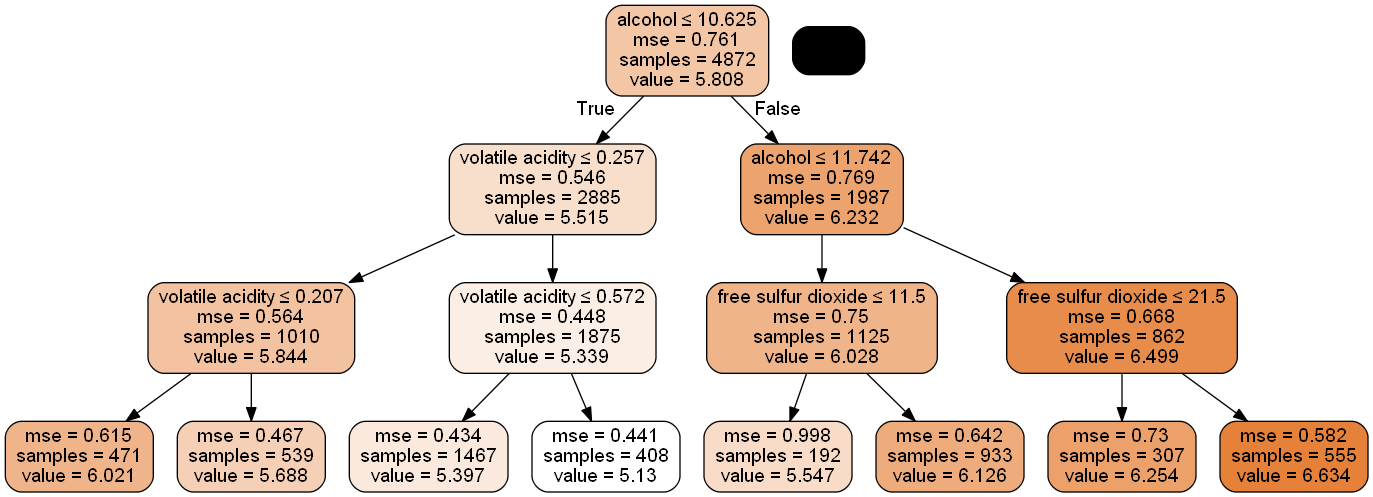

In [7]:
Image(graph.create_png())  

What is the actual practical meaning of the above tree.

We want to give him a wine and use the tree to predict its quality


In [8]:
# Lets see the process
feature_names = list(wine_df.loc[:, 'fixed acidity':'color'].columns)
print(tree.export_text(wine_tree, feature_names=feature_names))

|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.26
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- value: [6.02]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- value: [5.69]
|   |--- volatile acidity >  0.26
|   |   |--- volatile acidity <= 0.57
|   |   |   |--- value: [5.40]
|   |   |--- volatile acidity >  0.57
|   |   |   |--- value: [5.13]
|--- alcohol >  10.62
|   |--- alcohol <= 11.74
|   |   |--- free sulfur dioxide <= 11.50
|   |   |   |--- value: [5.55]
|   |   |--- free sulfur dioxide >  11.50
|   |   |   |--- value: [6.13]
|   |--- alcohol >  11.74
|   |   |--- free sulfur dioxide <= 21.50
|   |   |   |--- value: [6.25]
|   |   |--- free sulfur dioxide >  21.50
|   |   |   |--- value: [6.63]



Summary:

Decision trees give a very good understanding and therefore are easy to explain to someone else.

We want to first figure out the question that it will divide the data homogenously and the process goes on...

They can be created quickly without the need of StandarScaler